In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [13]:
df_dict = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mo2oM_FullResults/Mo2oM_{proj}.json") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df.groupby("threshold", as_index=False).mean()
	df = df[(df["threshold"] != 0) & (df["threshold"] != 1)]
	df["overall"] = 0.75 + 0.25 * df["SM"] - 0.25 * df["ICP"] - 0.25 * df["NED"] - 0.25 * df["IFN"]
	df_dict[proj] = df

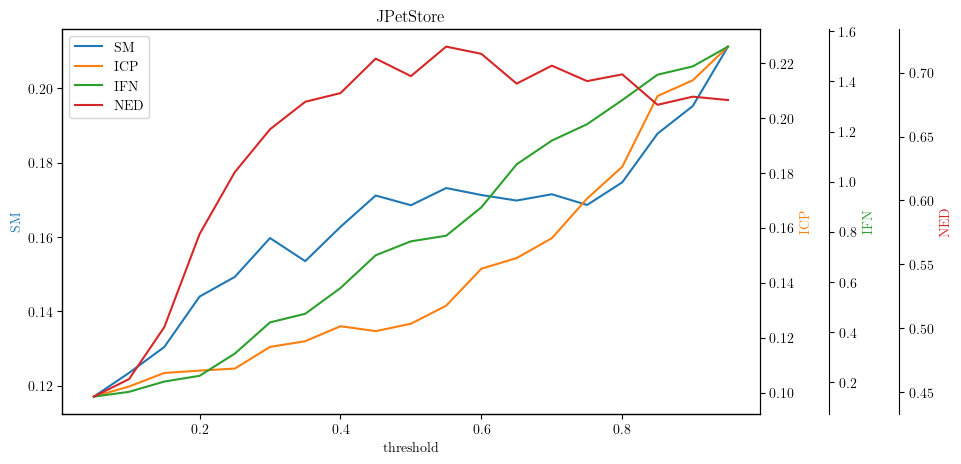

In [17]:
fig, ax = plt.subplots()
ax.set_title("JPetStore")
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["SM"], "-C0", label="SM")
p2, = twin1.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["ICP"], "-C1", label="ICP")
p3, = twin2.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["IFN"], "-C2", label="IFN")
p4, = twin3.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["NED"], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

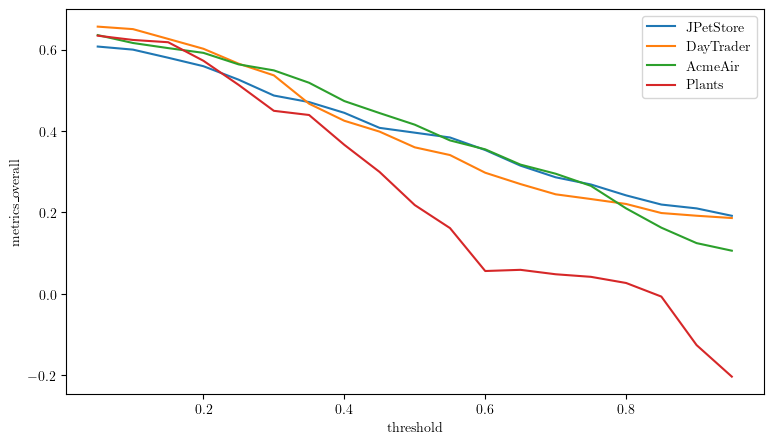

In [15]:
projects_overall = {proj: df["overall"] for proj, df in df_dict.items()}
projects_overall["threshold"] = df_dict["JPetStore"]["threshold"]
projects_overall = pd.DataFrame(projects_overall).set_index("threshold")
ax = projects_overall.plot(ylabel="metrics_overall")  # colormap="crest")
ax.get_figure().savefig("OverallLineChart.pdf", bbox_inches="tight")

In [16]:
projects_overall
# 0.05 - 0.25

,JPetStore,DayTrader,AcmeAir,Plants
threshold,,,,
0.05,0.607347,0.656268,0.635458,0.633999
0.10,0.599791,0.650149,0.616052,0.623560
0.15,0.579863,0.626117,0.603510,0.617944
0.20,0.559120,0.601902,0.591877,0.572433
0.25,0.525991,0.565255,0.563577,0.513216
0.30,0.487096,0.536622,0.548858,0.449572
0.35,0.471029,0.466985,0.518464,0.439306
0.40,0.444612,0.425146,0.473500,0.366081
0.45,0.407715,0.398521,0.444060,0.299553
